Q1. Create a file that contains 1000 lines of random strings.

In [ ]:
import random
import string

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

file_path = 'random_strings_1000.txt'

with open(file_path, 'w') as file:
    for _ in range(1000):
        random_string = generate_random_string(10)  # Adjust the length of the random string as needed
        file.write(random_string + '\n')


Q2. Create a file that contains multiple lines of random strings and file size must be 5 MB.

In [ ]:
import random
import string
import os

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

file_path = 'random_strings_5mb.txt'
file_size = 5 * 1024 * 1024  # 5 MB

with open(file_path, 'w') as file:
    while os.stat(file_path).st_size < file_size:
        random_string = generate_random_string(10)  # Adjust the length of the random string as needed
        file.write(random_string + '\n')


Q3. Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.

In [ ]:
import random
import string
import os

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

folder_path = 'random_strings_folder'
file_size = 5 * 1024 * 1024  # 5 MB

os.makedirs(folder_path, exist_ok=True)

for i in range(1, 11):
    file_path = os.path.join(folder_path, f'random_strings_{i}.txt')
    with open(file_path, 'w') as file:
        while os.stat(file_path).st_size < file_size:
            random_string = generate_random_string(10)  # Adjust the length of the random string as needed
            file.write(random_string + '\n')


Q4. Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.


In [ ]:
import random
import string
import os

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

folder_path = 'random_strings_folder'

os.makedirs(folder_path, exist_ok=True)

file_sizes = [1, 2, 3, 4, 5]  # Sizes in GB

for size in file_sizes:
    file_size = size * 1024 * 1024 * 1024  # Convert size to bytes
    file_path = os.path.join(folder_path, f'random_strings_{size}gb.txt')
    with open(file_path, 'w') as file:
        while os.stat(file_path).st_size < file_size:
            random_string = generate_random_string(10)  # Adjust the length of the random string as needed
            file.write(random_string + '\n')


Q5. Convert all the files of Q4 into upper case one by one.


In [ ]:

import os

folder_path = 'random_strings_folder'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r+') as file:
            content = file.read().upper()
            file.seek(0)
            file.write(content)
            file.truncate()



Q6. Convert all the files of Q4 into upper case parallel using multi-threading.

In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor

folder_path = 'random_strings_folder'

def convert_to_upper_case(file_path):
    with open(file_path, 'r+') as file:
        content = file.read().upper()
        file.seek(0)
        file.write(content)
        file.truncate()

with ThreadPoolExecutor() as executor:
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            executor.submit(convert_to_upper_case, file_path)



Q7. WAP to automatically download 10 images of cat from “Google Images”. [Hint: Find the package from pypi.org and use it]


In [ ]:
from google_images_download import google_images_download

# Set the search query and limit
search_query = "cat"
limit = 10

# Create an instance of the downloader
downloader = google_images_download.googleimagesdownload()

# Set the download arguments
download_args = {
    "keywords": search_query,
    "limit": limit,
    "output_directory": "cat_images"
}

# Download images
response = downloader.download(download_args)

# Print the downloaded images
print(response)



Q8. WAP to automatically download 10 videos of “Machine Learning” from “Youtube.com”. [Hint: Find the package from pypi.org and use it]


In [ ]:
from pytube import YouTube

search_query = "Machine Learning"
limit = 10

youtube_url = f"https://www.youtube.com/results?search_query={search_query}"
videos = YouTube.search(url=youtube_url, limit=limit)

for video in videos:
    video.streams.get_highest_resolution().download(output_path="machine_learning_videos")



Q9. Convert all the videos of Q8 and convert it to audio. [Hint: Find the package from pypi.org and use it]

In [ ]:
from moviepy.editor import VideoFileClip

videos_folder = "machine_learning_videos"
audio_folder = "machine_learning_audios"

os.makedirs(audio_folder, exist_ok=True)

for video_file in os.listdir(videos_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(videos_folder, video_file)
        audio_file = os.path.splitext(video_file)[0] + ".mp3"
        audio_path = os.path.join(audio_folder, audio_file)
        video_clip = VideoFileClip(video_path)
        audio_clip = video_clip.audio
        audio_clip.write_audiofile(audio_path)
        video_clip.close()



Q10. Create an automated pipeline using multi-threading for:
“Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”.


In [ ]:
import os
import threading
from pytube import YouTube
from moviepy.editor import VideoFileClip

search_query = "Machine Learning"
limit = 100

youtube_url = f"https://www.youtube.com/results?search_query={search_query}"
videos_folder = "machine_learning_videos"
audio_folder = "machine_learning_audios"

os.makedirs(videos_folder, exist_ok=True)
os.makedirs(audio_folder, exist_ok=True)

lock = threading.Lock()
counter = 0

def download_video(video_url):
    global counter
    video = YouTube(video_url)
    video.streams.get_highest_resolution().download(output_path=videos_folder)
    lock.acquire()
    counter += 1
    print(f"Downloaded video {counter}/{limit}")
    lock.release()

def convert_to_audio(video_file):
    video_path = os.path.join(videos_folder, video_file)
    audio_file = os.path.splitext(video_file)[0] + ".mp3"
    audio_path = os.path.join(audio_folder, audio_file)
    video_clip = VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_path)
    video_clip.close()
    lock.acquire()
    counter += 1
    print(f"Converted video {counter}/{limit} to audio")
    lock.release()

threads = []

# Download videos
for video in YouTube.search(url=youtube_url, limit=limit):
    video_url = f"https://www.youtube.com/watch?v={video.video_id}"
    thread = threading.Thread(target=download_video, args=(video_url,))
    threads.append(thread)
    thread.start()

# Wait for all download threads to finish
for thread in threads:
    thread.join()

# Reset counter for audio conversion
counter = 0

# Convert videos to audio
for video_file in os.listdir(videos_folder):
    if video_file.endswith('.mp4'):
        thread = threading.Thread(target=convert_to_audio, args=(video_file,))
        threads.append(thread)
        thread.start()

# Wait for all conversion threads to finish
for thread in threads:
    thread.join()



Q11. Create an automated pipeline using multi-threading for: “Automatic Download of 500 images of Dog from GoogleImages” → “Rescale it to 50%”.

In [ ]:
import os
import threading
from google_images_download import google_images_download
from PIL import Image

search_query = "dog"
limit = 500
rescale_factor = 0.5

image_folder = "dog_images"
rescaled_folder = "rescaled_dog_images"

os.makedirs(image_folder, exist_ok=True)
os.makedirs(rescaled_folder, exist_ok=True)

response = google_images_download.googleimagesdownload()

arguments = {
    "keywords": search_query,
    "limit": limit,
    "print_urls": True,
    "output_directory": image_folder
}

response.download(arguments)

lock = threading.Lock()
counter = 0

def rescale_image(image_file):
    global counter
    image_path = os.path.join(image_folder, image_file)
    rescaled_file = f"rescaled_{image_file}"
    rescaled_path = os.path.join(rescaled_folder, rescaled_file)
    image = Image.open(image_path)
    rescaled_image = image.resize((int(image.width * rescale_factor), int(image.height * rescale_factor)))
    rescaled_image.save(rescaled_path)
    lock.acquire()
    counter += 1
    print(f"Rescaled image {counter}/{limit}")
    lock.release()

threads = []

# Rescale images
for image_file in os.listdir(image_folder):
    thread = threading.Thread(target=rescale_image, args=(image_file,))
    threads.append(thread)
    thread.start()

# Wait for all rescaling threads to finish
for thread in threads:
    thread.join()


Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

Number of rows with missing values: 51


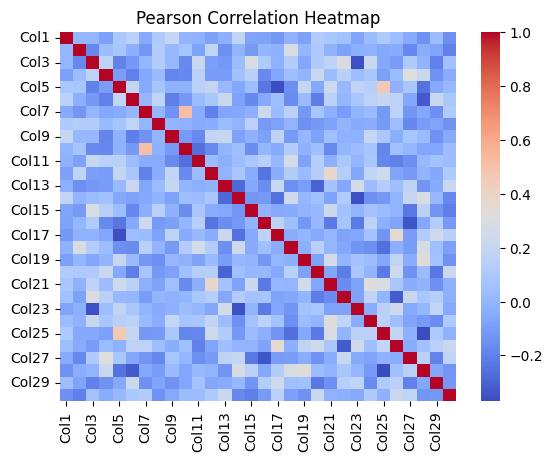

IndexError: ignored

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Create a random dataset of 100 rows and 30 columns
dataset = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f"Col{i+1}" for i in range(30)])

# (i) Replace values with NA in the dataset defined between [10, 60]
dataset.iloc[10:61] = np.nan

# Count the number of rows with missing values
rows_with_missing = dataset.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_missing)

# (ii) Replace NA values with column-wise average
dataset = dataset.fillna(dataset.mean())

# (iii) Calculate Pearson correlation and plot heatmap
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Select columns with correlation <= 0.7
selected_columns = correlation_matrix.columns[correlation_matrix <= 0.7].tolist()
print("Selected columns with correlation <= 0.7:", selected_columns)

# (iv) Normalize values between 0 and 10
normalized_dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min()) * 10

# (v) Replace values with 1 if <= 0.5 else with 0
binary_dataset = normalized_dataset.applymap(lambda x: 1 if x <= 0.5 else 0)




Q13. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

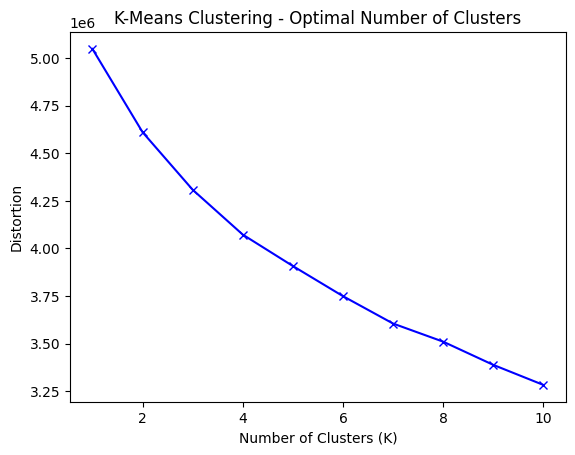

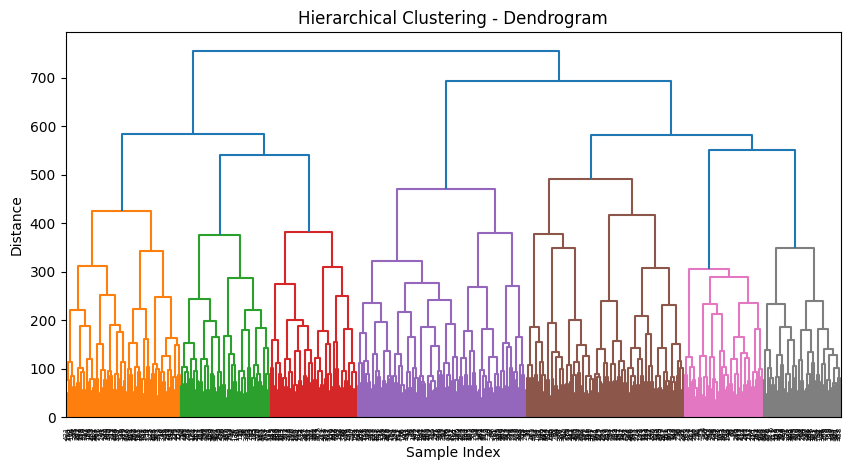

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random seed for reproducibility
np.random.seed(0)

# (i) Create a random dataset
dataset = pd.DataFrame(
    np.random.uniform(-10, 100, size=(500, 10)),
    columns=[f"Column{i+1}" for i in range(10)]
)

# (ii) Apply K-Means clustering
distortions = []
K = range(1, 11)  # Test cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset)
    distortions.append(kmeans.inertia_)

# Plot the distance metric graph for K-Means clustering
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('K-Means Clustering - Optimal Number of Clusters')
plt.show()

# (iii) Apply Hierarchical clustering
Z = linkage(dataset, 'ward')

# Plot the distance metric graph for Hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering - Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.


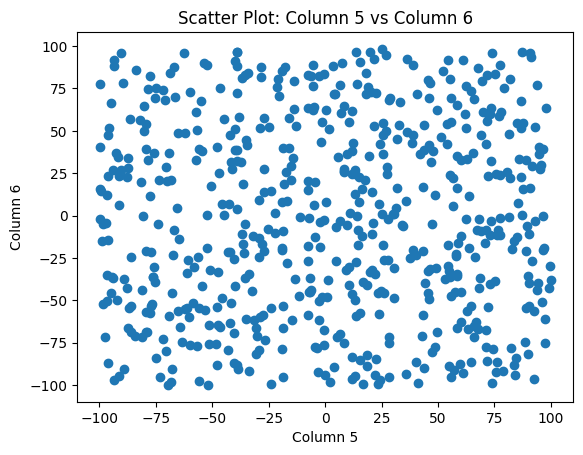

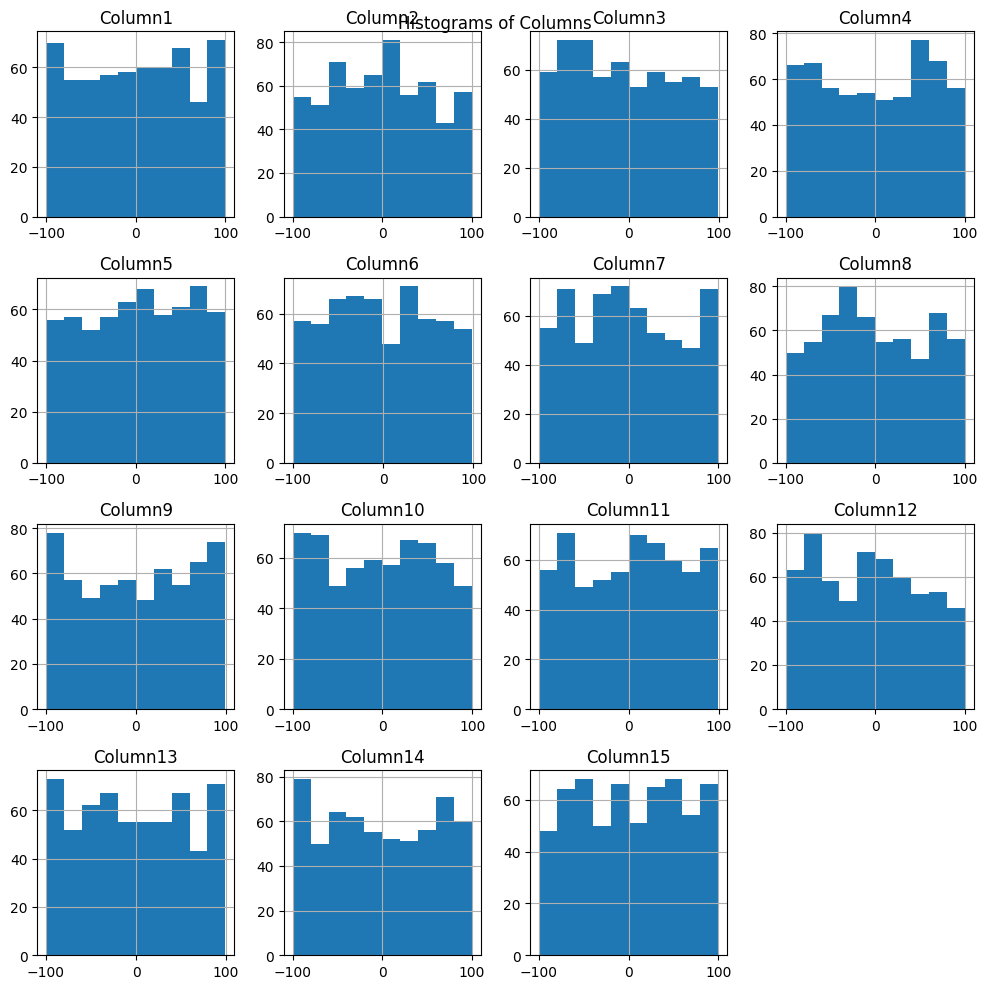

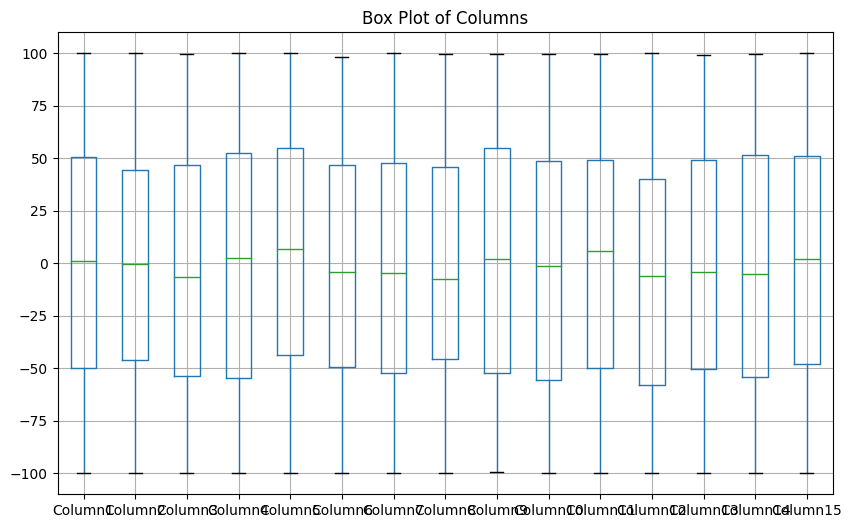

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# (i) Create a random dataset
dataset = pd.DataFrame(np.random.uniform(-100, 100, size=(600, 15)), columns=[f"Column{i+1}" for i in range(15)])

# (ii) Plot a scatter graph between Column 5 and Column 6
plt.scatter(dataset["Column5"], dataset["Column6"])
plt.xlabel("Column 5")
plt.ylabel("Column 6")
plt.title("Scatter Plot: Column 5 vs Column 6")
plt.show()

# (iii) Plot histograms of each column in a single graph
dataset.hist(figsize=(10, 10))
plt.tight_layout()
plt.suptitle("Histograms of Columns")
plt.show()

# (iv) Plot box plots of each column in a single graph
dataset.boxplot(figsize=(10, 6))
plt.title("Box Plot of Columns")
plt.show()



Q15. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Set random seed for reproducibility
np.random.seed(0)

# (i) Create a random dataset
dataset = pd.DataFrame(np.random.uniform(5, 10, size=(500, 5)), columns=[f"Column{i+1}" for i in range(5)])

# (i) Perform t-Test on each column
for col in dataset.columns:
    t_statistic, p_value = ttest_1samp(dataset[col], 5.0)
    print(f"Column: {col}, t-statistic: {t_statistic}, p-value: {p_value}")

# (ii) Perform Wilcoxon Signed Rank Test on each column
for col in dataset.columns:
    test_statistic, p_value = wilcoxon(dataset[col] - 5.0)
    print(f"Column: {col}, test statistic: {test_statistic}, p-value: {p_value}")

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
t_statistic, p_value = ttest_ind(dataset["Column3"], dataset["Column4"])
print(f"Two Sample t-Test: t-statistic: {t_statistic}, p-value: {p_value}")

test_statistic, p_value = ranksums(dataset["Column3"], dataset["Column4"])
print(f"Wilcoxon Rank Sum Test: test statistic: {test_statistic}, p-value: {p_value}")


Column: Column1, t-statistic: 38.66636755384068, p-value: 3.1974335962740814e-152
Column: Column2, t-statistic: 39.15848058889314, p-value: 2.7674282558934712e-154
Column: Column3, t-statistic: 35.8306969481363, p-value: 4.438711855820085e-140
Column: Column4, t-statistic: 38.19630984925718, p-value: 3.0718264532555075e-150
Column: Column5, t-statistic: 40.53564258843622, p-value: 5.49070828707874e-160
Column: Column1, test statistic: 0.0, p-value: 1.2647189486921487e-83
Column: Column2, test statistic: 0.0, p-value: 1.2647189486921487e-83
Column: Column3, test statistic: 0.0, p-value: 1.2647189486921487e-83
Column: Column4, test statistic: 0.0, p-value: 1.2647189486921487e-83
Column: Column5, test statistic: 0.0, p-value: 1.2647189486921487e-83
Two Sample t-Test: t-statistic: -2.247063444749178, p-value: 0.024853826680129795
Wilcoxon Rank Sum Test: test statistic: -2.1635180585357703, p-value: 0.03050135631839345
